In [5]:
'''
Implementing Feedforward neural networks with Keras and TensorFlow
a. Import the necessary packages
b. Load the training and testing data (MNIST/CIFAR10)
c. Define the network architecture using Keras
d. Train the model using SGD
e. Evaluate the network
f. Plot the training loss and accuracy
'''

'\nImplementing Feedforward neural networks with Keras and TensorFlow\na. Import the necessary packages\nb. Load the training and testing data (MNIST/CIFAR10)\nc. Define the network architecture using Keras\nd. Train the model using SGD\ne. Evaluate the network\nf. Plot the training loss and accuracy\n'

In [25]:
# a) importing necessary packages

import tensorflow as tf    
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import random #generate a random number for prediction

In [12]:
# b) Load Training and Tesing Data
#MNIST->mnist digits classification dataset of 60 thousand 28*28 grayscale images of 10digits
mnist = tf.keras.datasets.mnist #Importing MNIST Dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data() #Splitting it into training and testing



11490434/11490434 [==============================] - 18s 2us/step


In [15]:
#grayscale was 0 to 255 inorder to convert in range of 0 to 1
x_train = x_train/255
x_test = x_test/255

In [18]:
# c) Define the network architecture using keras
#var model call the keras swquential method for input , hidden , output layer

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #final layers data into vector form
    keras.layers.Dense(128,activation="relu"), # 128 neurons helps model to learn faster and performance better
    keras.layers.Dense(10,activation="softmax") # 10 neurons output multiclassification model
])

In [20]:
model.summary() #what is happening input hidden output

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
# d) Trained the model using sgd ->Stochastic Graident Descent -> optimising the ML models
#complie is used to train (optimise,dissimiarity,performace measures)

model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [23]:
#fit the model(training , onbasis data ,epoch)
#Epoch as the total number of iterations of all the training data in one cycle for training the ML model
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=5)

Epoch 1/5
1875/1875 [==============================] - 15s 7ms/step - loss: 0.6533 - accuracy: 0.8324 - val_loss: 0.3615 - val_accuracy: 0.9037
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3389 - accuracy: 0.9050 - val_loss: 0.2921 - val_accuracy: 0.9202
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2887 - accuracy: 0.9186 - val_loss: 0.2625 - val_accuracy: 0.9266
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2576 - accuracy: 0.9272 - val_loss: 0.2376 - val_accuracy: 0.9336
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2339 - accuracy: 0.9345 - val_loss: 0.2197 - val_accuracy: 0.9394


In [24]:
 #Evalute the network
test_loss,test_acc = model.evaluate(x_test,y_test)
print('Loss = %.3f' %test_loss)
print('Accuracy = %.3f' %test_acc)

313/313 [==============================] - 1s 4ms/step - loss: 0.2197 - accuracy: 0.9394
Loss = 0.220
Accuracy = 0.939


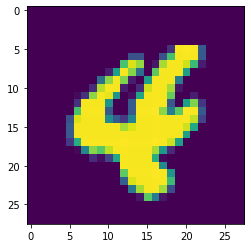

313/313 [==============================] - 1s 3ms/step


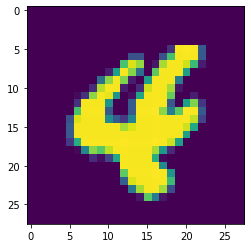

predicted value [1.1813402e-06 2.3897478e-06 8.5250707e-05 7.3125199e-07 9.9266833e-01
 6.1605347e-06 1.5824634e-03 2.0917492e-04 4.9641484e-04 4.9479199e-03]


In [26]:
n = random.randint(0,9999)
plt.imshow(x_test[n]) #image show
plt.show()
predicted_value = model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

print('predicted value',predicted_value[n])

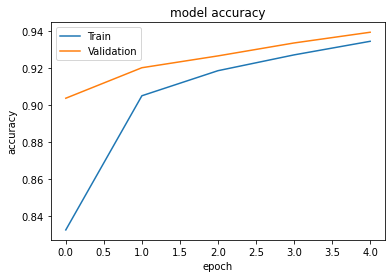

In [33]:
# f) Plot  the Training Loss and Accuracy

# 1. Plotting The Training  Accuracy :-
plt.plot(history.history['accuracy']) #training accuracy
plt.plot(history.history['val_accuracy']) #validate accuracy
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

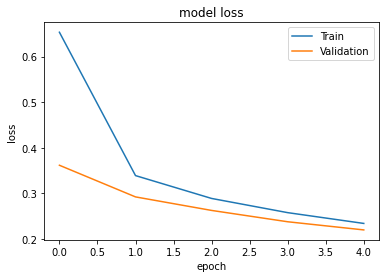

In [32]:
# 2. Plotting The Training  Loss :-
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'],loc='upper right')
plt.show()